# seaborn.countplot对输入的数据分类，条形图显示各个分类的数量
**seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs) 

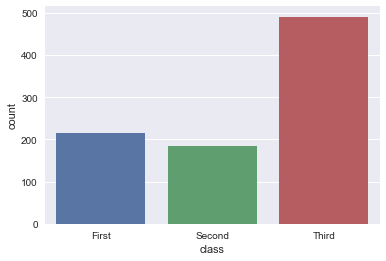

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="class", data=titanic)  # x是所在的列名


**x, y, hue : names of variables in data or vector data, optional**

**ax : matplotlib Axes, optional**

Axes object to draw the plot onto, otherwise uses the current Axes.

kwargs : key, value mappings



**Returns:	**
**ax : matplotlib Axes**

Returns the Axes object with the plot drawn onto it.

In [26]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


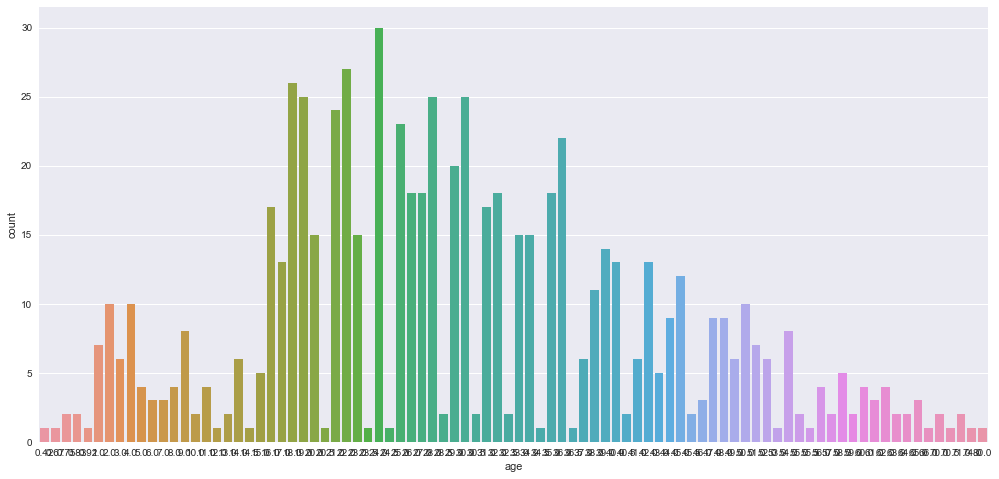

In [27]:
plt.figure(figsize=(17,8))
sns.countplot(titanic['age'])

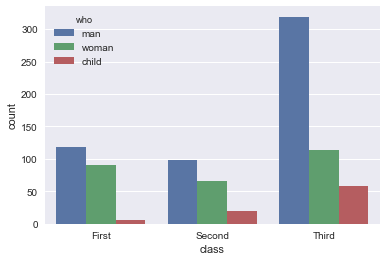

In [28]:
ax = sns.countplot(x="class", hue="who", data=titanic)

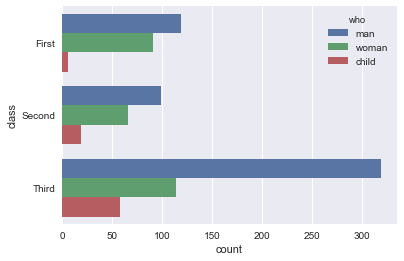

In [29]:
ax = sns.countplot(y="class", hue="who", data=titanic)

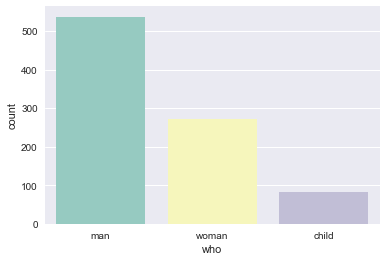

In [30]:
ax = sns.countplot(x="who", data=titanic, palette="Set3")  # palette 调色板

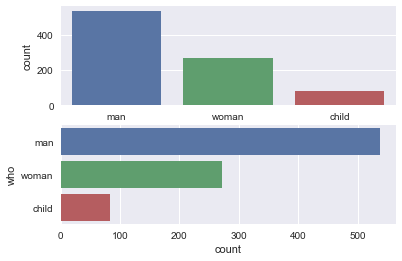

In [31]:
fig,axes=plt.subplots(2,1)
sns.countplot(x="who",data=titanic,ax=axes[0]) 
sns.countplot(y="who",data=titanic,ax=axes[1])  

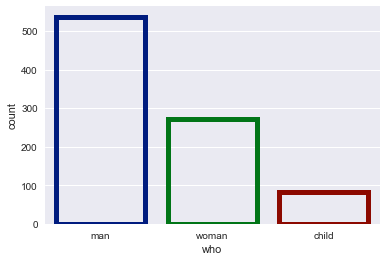

In [32]:
ax = sns.countplot(x="who", data=titanic,
                    facecolor=(0, 0, 0, 0),
                    linewidth=5,
                    edgecolor=sns.color_palette("dark", 3))

**seaborn.FacetGrid**

**class seaborn.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)**

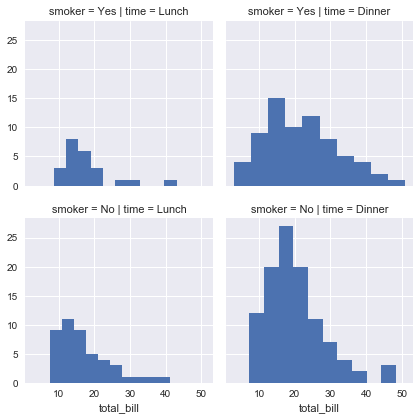

In [46]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

In [40]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


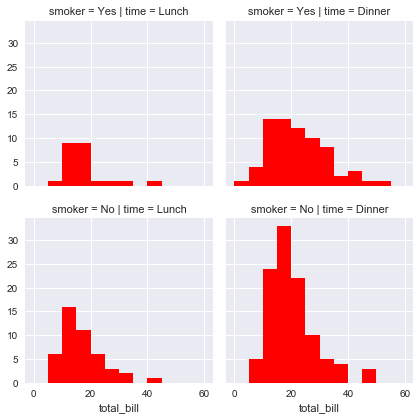

In [47]:
import numpy as np
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill", bins=bins, color="r")

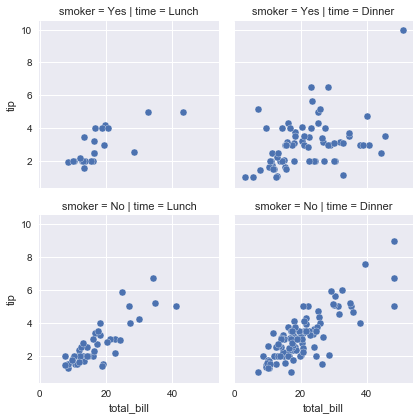

In [48]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.scatter, "total_bill", "tip", edgecolor="w")

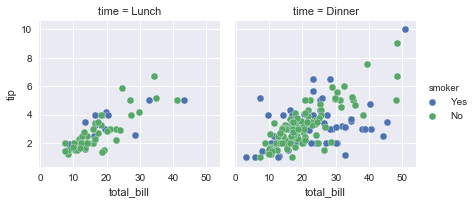

In [50]:
g = sns.FacetGrid(tips, col="time",  hue="smoker")
g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w").add_legend())

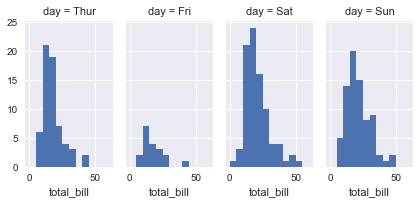

In [54]:
g = sns.FacetGrid(tips, col="day",  aspect=.5)
g = g.map(plt.hist, "total_bill", bins=bins)

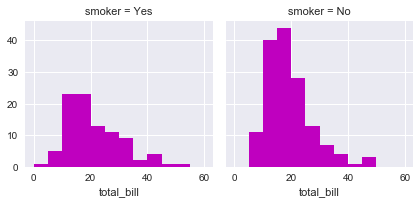

In [55]:
g = sns.FacetGrid(tips, col="smoker", col_order=["Yes", "No"])
g = g.map(plt.hist, "total_bill", bins=bins, color="m")

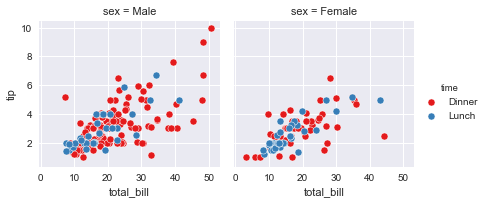

In [56]:
kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tips, col="sex", hue="time", palette="Set1",hue_order=["Dinner", "Lunch"])
g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())


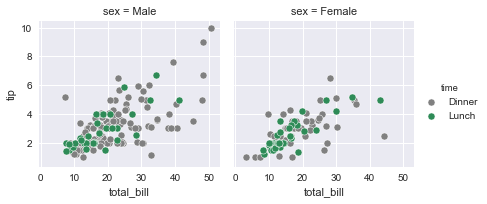

In [60]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal,hue_order=["Dinner", "Lunch"])
     
g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())     

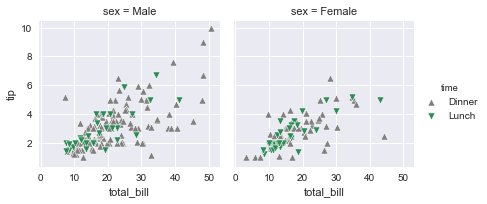

In [61]:
g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal,hue_order=["Dinner", "Lunch"],hue_kws=dict(marker=["^", "v"]))
g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())

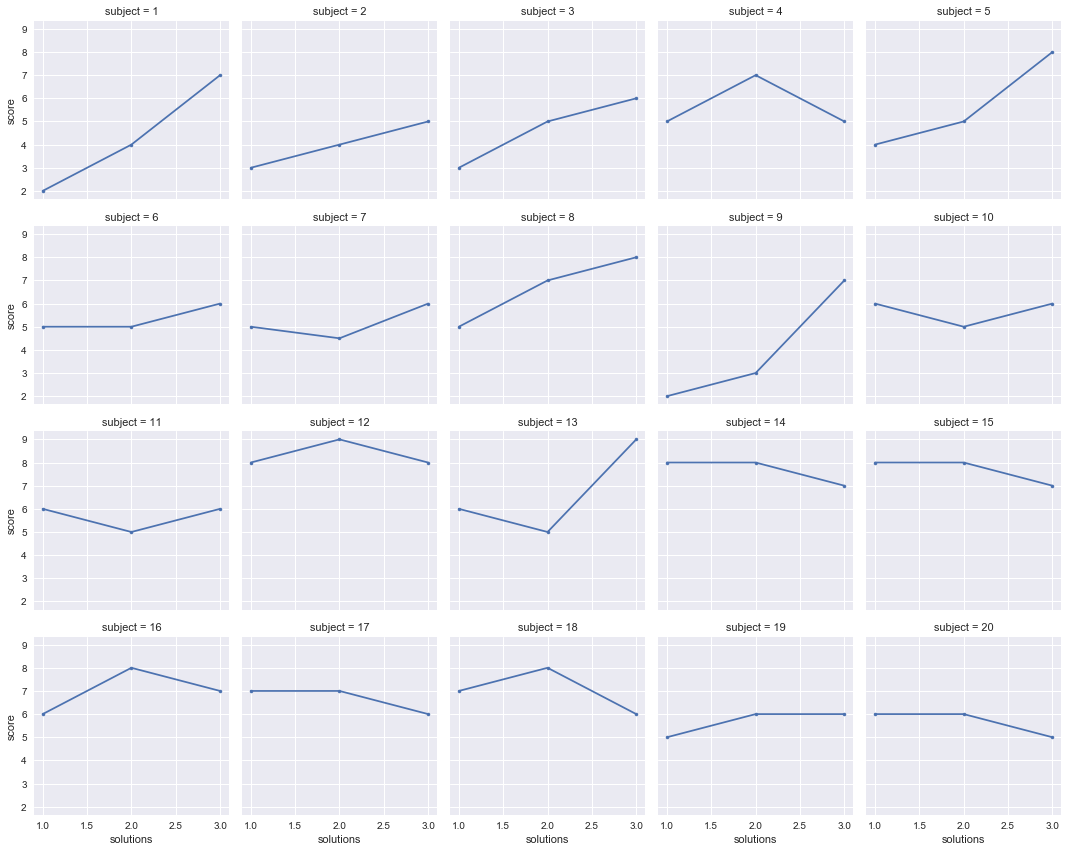

In [63]:
att = sns.load_dataset("attention")
g = sns.FacetGrid(att, col="subject", col_wrap=5)
g = g.map(plt.plot, "solutions", "score", marker=".")

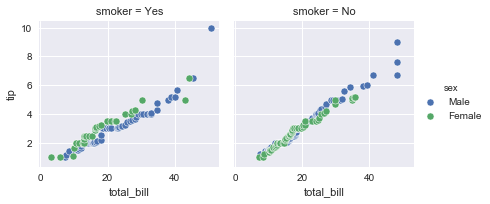

In [70]:
from scipy import stats
def qqplot(x, y, **kwargs):
        _, xr = stats.probplot(x, fit=False)
        _, yr = stats.probplot(y, fit=False)
        plt.scatter(xr, yr, **kwargs)
g = sns.FacetGrid(tips, col="smoker", hue="sex")
g = (g.map(qqplot, "total_bill", "tip", **kws).add_legend())

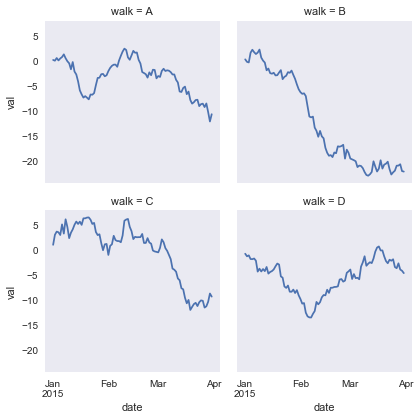

In [72]:
import pandas as pd
df = pd.DataFrame(
     data=np.random.randn(90, 4),
     columns=pd.Series(list("ABCD"), name="walk"),
     index=pd.date_range("2015-01-01", "2015-03-31",
                         name="date"))
df = df.cumsum(axis=0).stack().reset_index(name="val")
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
g = sns.FacetGrid(df, col="walk", col_wrap=2)
g = g.map_dataframe(dateplot, "date", "val")